In [3]:
import pandas as pd
from pathlib import Path
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('excluded_datasets_list.csv')
df.head()

,region,data_group,dataset,exclusion_type,inclusion_possible
0,alaska,demdiff_and_glaciological,UZH_GlaciolSineWave,annual,yes
1,alaska,demdiff_and_glaciological,WGMS-mean_ba,annual,yes
2,alaska,gravimetry,Jacob_2012_dmdt,annual,yes
3,antarctic_and_subantarctic,altimetry,Gardner2013_icesat,annual,no
4,antarctic_and_subantarctic,altimetry,Khan,annual,yes


In [5]:
# Number of total excluded datasets
len(df)

142

In [6]:
dataset_to_group = {} 
counts = defaultdict(int)

for f in Path('.').rglob('*.csv'):
    dataset = f.stem
    data_group = f.parent.name
    if dataset not in dataset_to_group:
        dataset_to_group[dataset] = data_group
    counts[dataset] += 1

# Build DataFrame with both
result = pd.DataFrame([
    (ds, dataset_to_group[ds], n) 
    for ds, n in sorted(counts.items(), key=lambda x: -x[1])
], columns=['dataset', 'data_group', 'n_regions'])

print(result.head(25))

                 dataset     data_group  n_regions
0           DUS-combined       combined         19
1                   Huss       combined         19
2           Huss_monthly       combined         19
3                    ETH        demdiff         19
4              WGMS-beta  glaciological         19
5           WGMS-mean_ba  glaciological         19
6    UZH_GlaciolSineWave  glaciological         18
7        Jacob_2012_dmdt     gravimetry         17
8                Wouters     gravimetry         17
9   Sasgen_AWIarc_RL01_2     gravimetry         16
10       Jakob_Gourmelen      altimetry         12
11           Harig_Group     gravimetry         10
12             Velicogna     gravimetry          7
13          Zheng et al.        demdiff          7
14    ArcticInSituvGRACE       combined          6
15               Box2018       combined          6
16    Gardner2013_icesat      altimetry          6
17                 Tepes      altimetry          5
18   LEGOS-MAGELLIUM-bis     gr

In [7]:
# Dataset count per source and which method they belong to
agg = df.groupby('dataset').agg(
    data_groups=('data_group', lambda x: ', '.join(sorted(x.unique()))),
    count=('region', 'count')
).sort_values('count', ascending=False)
print(agg.to_string()) # Most important/commonly used datasets: Jacob_2012_dmdt, Wouters, WGMS-mean_ba, UZH_GlaciolSineWeve, Sasgen_AWIarc_RL01_2, Harig_Group, Gardner2013_icesat, Treichler_ICESat

print(f"\nNumber of datasets (unique): {len(agg)}")

                                    data_groups  count
dataset                                               
Jacob_2012_dmdt                      gravimetry     27
Wouters                              gravimetry     20
WGMS-mean_ba          demdiff_and_glaciological     19
UZH_GlaciolSineWave   demdiff_and_glaciological     18
Sasgen_AWIarc_RL01_2                 gravimetry     18
Harig_Group                          gravimetry      8
Gardner2013_icesat                    altimetry      6
Treichler_ICESat                      altimetry      6
Tepes                                 altimetry      5
Khan                                  altimetry      4
Treichler_snowfall                    altimetry      3
Ke                                    altimetry      3
Bolch_2013                            altimetry      1
Menounos_WNA_glac     demdiff_and_glaciological      1
Menounos_WNA_alt1                     altimetry      1
Foresta                               altimetry      1
Menounos_W

In [8]:
agg = df.drop_duplicates(subset=['region', 'data_group', 'dataset']).groupby('dataset').agg(
    data_groups=('data_group', lambda x: ', '.join(sorted(x.unique()))),
    count=('region', 'count')
).sort_values('count', ascending=False)

print(agg.to_string()) # datasets annual/trend combined

                                    data_groups  count
dataset                                               
WGMS-mean_ba          demdiff_and_glaciological     19
UZH_GlaciolSineWave   demdiff_and_glaciological     18
Jacob_2012_dmdt                      gravimetry     17
Wouters                              gravimetry     10
Sasgen_AWIarc_RL01_2                 gravimetry      9
Gardner2013_icesat                    altimetry      6
Tepes                                 altimetry      5
Khan                                  altimetry      4
Harig_Group                          gravimetry      4
Treichler_snowfall                    altimetry      3
Treichler_ICESat                      altimetry      3
Ke                                    altimetry      3
Bolch_2013                            altimetry      1
Menounos_WNA_glac     demdiff_and_glaciological      1
Menounos_WNA_alt1                     altimetry      1
Foresta                               altimetry      1
Menounos_W

In [5]:
# Dataset count per source and which method they belong to (only includable)
includable = df[df['inclusion_possible'] == 'yes']
agg = includable.groupby('dataset').agg(
    data_groups=('data_group', lambda x: ', '.join(sorted(x.unique()))),
    count=('region', 'count')
).sort_values('count', ascending=False)
print(agg.to_string()) # the most commonly used datasets are not affected by inclusion

                                    data_groups  count
dataset                                               
Jacob_2012_dmdt                      gravimetry     27
Wouters                              gravimetry     20
WGMS-mean_ba          demdiff_and_glaciological     19
UZH_GlaciolSineWave   demdiff_and_glaciological     18
Sasgen_AWIarc_RL01_2                 gravimetry     18
Harig_Group                          gravimetry      8
Tepes                                 altimetry      5
Gardner2013_icesat                    altimetry      4
Treichler_ICESat                      altimetry      3
Ke                                    altimetry      3
Khan                                  altimetry      2
Menounos_WNA_alt1                     altimetry      1
Foresta                               altimetry      1
Menounos_WNA_glac     demdiff_and_glaciological      1
Menounos_WNA_is2gedi                  altimetry      1


In [6]:
# Dataset count per source and which method they belong to (only non-includable)
non_includable = df[df['inclusion_possible'] == 'no']
agg = non_includable.groupby('dataset').agg(
    data_groups=('data_group', lambda x: ', '.join(sorted(x.unique()))),
    count=('region', 'count')
).sort_values('count', ascending=False)
print(agg.to_string()) # so it is mostly altimetry datasets which we cannot use

                   data_groups  count
dataset                              
Treichler_snowfall   altimetry      3
Treichler_ICESat     altimetry      3
Khan                 altimetry      2
Gardner2013_icesat   altimetry      2
Bolch_2013           altimetry      1


In [7]:
# exclusion_type vs inclusion_possible
print(pd.crosstab(df['exclusion_type'], df['inclusion_possible'], margins=False)) # only annual datasets cause problems with inclusion -> what even are annual and trend datasets, what is the difference?

inclusion_possible  no  yes
exclusion_type             
annual              11   95
trend                0   36


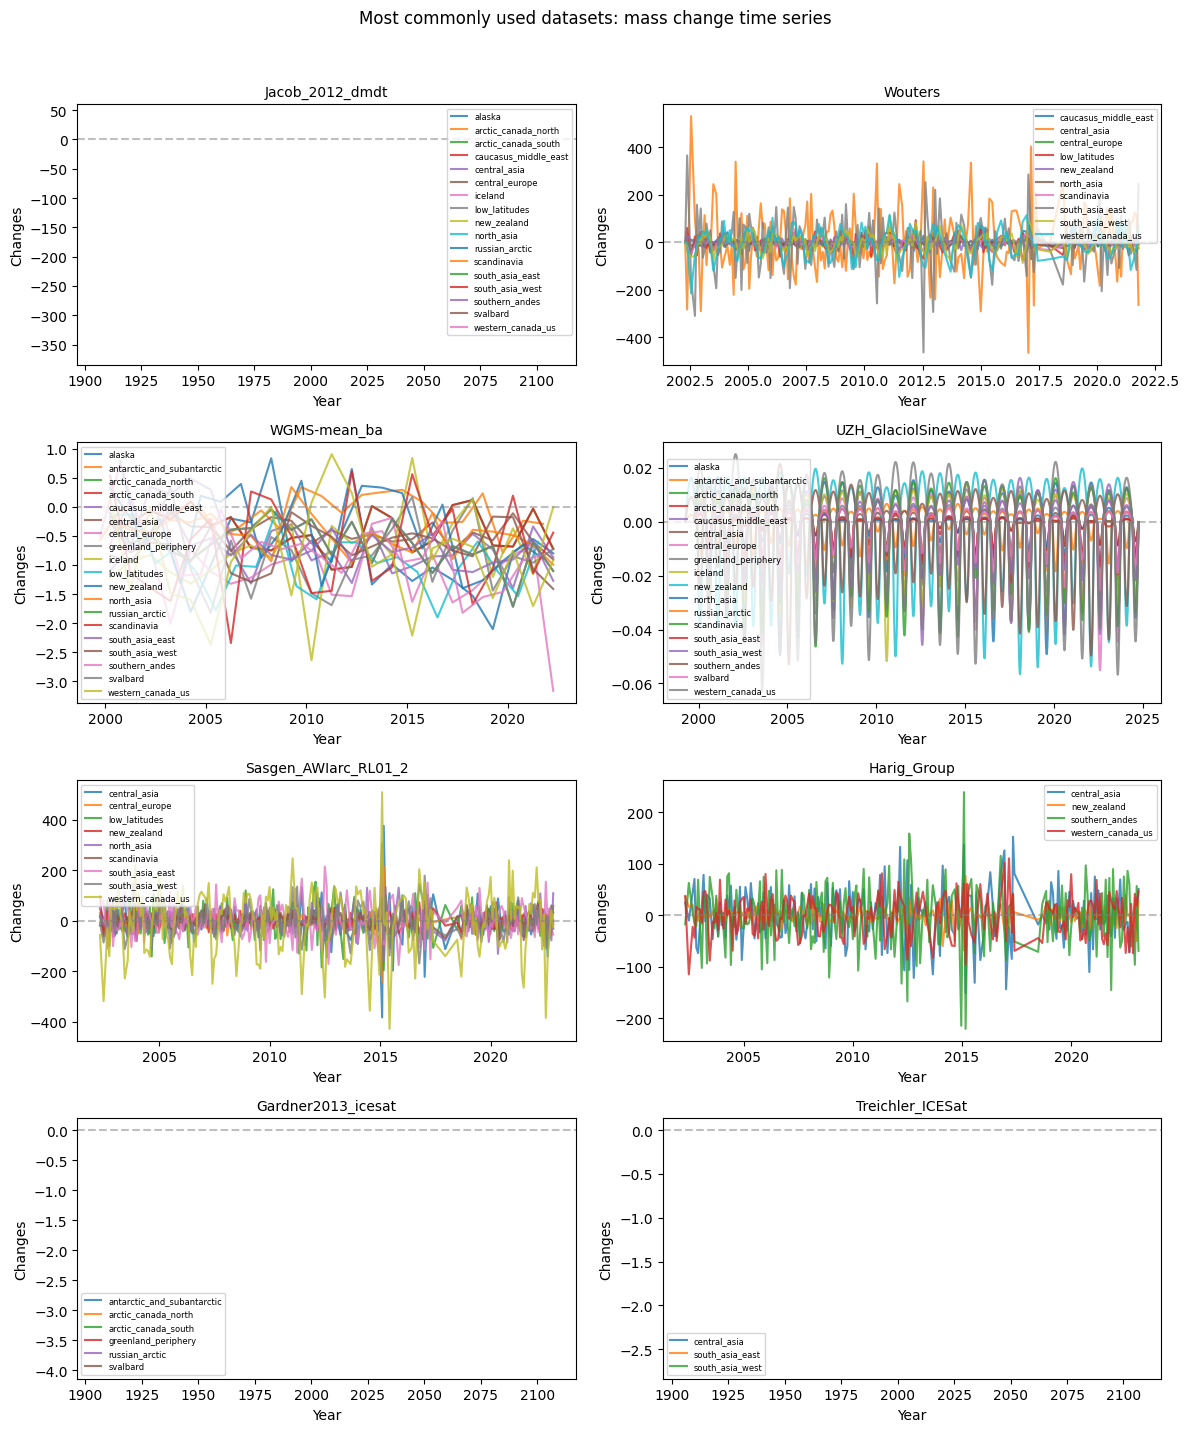

In [ ]:
# Load actual input CSVs and plot changes over time
top_datasets = ['Jacob_2012_dmdt', 'Wouters', 'WGMS-mean_ba', 'UZH_GlaciolSineWave',
                'Sasgen_AWIarc_RL01_2', 'Harig_Group', 'Gardner2013_icesat', 'Treichler_ICESat']
data_group_to_folder = {'gravimetry': 'gravimetry', 'altimetry': 'altimetry', 'demdiff_and_glaciological': 'glaciological'}
base = Path('.')

# Build (region, dataset) -> path from excluded list
rows = df[df['dataset'].isin(top_datasets)].drop_duplicates(subset=['region', 'dataset'])
all_data = []
for _, r in rows.iterrows():
    folder = data_group_to_folder.get(r['data_group'], r['data_group'])
    fp = base / r['region'] / folder / f"{r['dataset']}.csv"
    if fp.exists():
        d = pd.read_csv(fp)
        d['region'] = r['region']
        d['dataset'] = r['dataset']
        if 'start_dates' in d.columns and 'end_dates' in d.columns and 'changes' in d.columns:
            d['mid_date'] = (d['start_dates'] + d['end_dates']) / 2
            all_data.append(d)

combined = pd.concat(all_data, ignore_index=True)

# Plot: one subplot per dataset, each region as a line
fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes = axes.flatten()
for i, ds in enumerate(top_datasets):
    ax = axes[i]
    subset = combined[combined['dataset'] == ds]
    for region in subset['region'].unique():
        rsub = subset[subset['region'] == region].sort_values('mid_date')
        ax.plot(rsub['mid_date'], rsub['changes'], alpha=0.8, label=region)
    ax.set_title(ds, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Changes')
    ax.legend(fontsize=6)
    ax.axhline(0, color='gray', ls='--', alpha=0.5)
plt.suptitle('Most commonly used datasets: mass change time series', fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

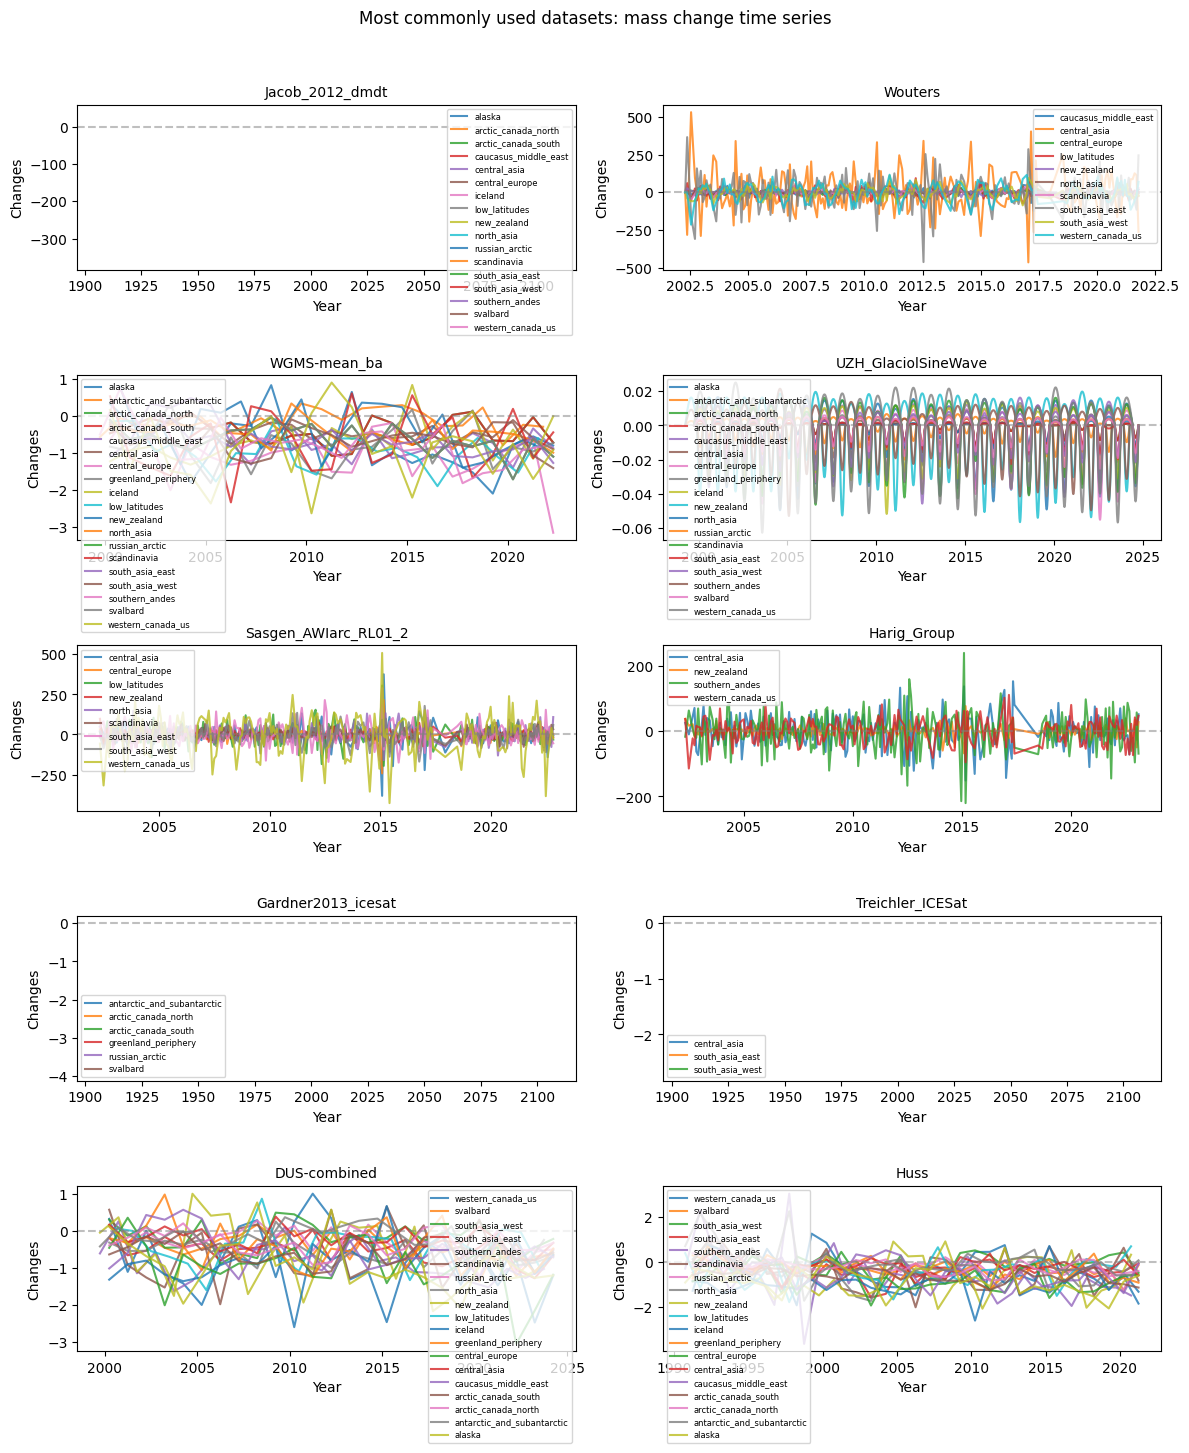

In [37]:
top_datasets = ['Jacob_2012_dmdt', 'Wouters', 'WGMS-mean_ba', 'UZH_GlaciolSineWave',
                'Sasgen_AWIarc_RL01_2', 'Harig_Group', 'Gardner2013_icesat', 'Treichler_ICESat',
                'DUS-combined', 'Huss']  # add these

data_group_to_folder = {'gravimetry': 'gravimetry', 'altimetry': 'altimetry', 
                        'demdiff_and_glaciological': 'glaciological', 'combined': 'combined'}
base = Path('.')

rows_from_df = df[df['dataset'].isin(top_datasets)].drop_duplicates(subset=['region', 'dataset'])
all_data = []

# Datasets in excluded list: use df for paths
for _, r in rows_from_df.iterrows():
    folder = data_group_to_folder.get(r['data_group'], r['data_group'])
    fp = base / r['region'] / folder / f"{r['dataset']}.csv"
    if fp.exists():
        d = pd.read_csv(fp)
        d['region'] = r['region']
        d['dataset'] = r['dataset']
        if 'start_dates' in d.columns and 'end_dates' in d.columns and 'changes' in d.columns:
            d['mid_date'] = (d['start_dates'] + d['end_dates']) / 2
            all_data.append(d)

# Datasets NOT in excluded list: scan folder structure
datasets_not_in_df = [ds for ds in top_datasets if ds not in df['dataset'].values]
for ds in datasets_not_in_df:
    for fp in base.rglob(f'{ds}.csv'):
        if fp.name in ('excluded_datasets_list.csv', 'dataset_info.csv'):
            continue
        d = pd.read_csv(fp)
        d['region'] = fp.parent.parent.name  # region is grandparent
        d['dataset'] = ds
        if 'start_dates' in d.columns and 'end_dates' in d.columns and 'changes' in d.columns:
            d['mid_date'] = (d['start_dates'] + d['end_dates']) / 2
            all_data.append(d)

combined = pd.concat(all_data, ignore_index=True)

# Plot: one subplot per dataset, each region as a line
fig, axes = plt.subplots(5, 2, figsize=(12, 14))
axes = axes.flatten()
for i, ds in enumerate(top_datasets):
    ax = axes[i]
    subset = combined[combined['dataset'] == ds]
    for region in subset['region'].unique():
        rsub = subset[subset['region'] == region].sort_values('mid_date')
        ax.plot(rsub['mid_date'], rsub['changes'], alpha=0.8, label=region)
    ax.set_title(ds, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Changes')
    ax.legend(fontsize=6)
    ax.axhline(0, color='gray', ls='--', alpha=0.5)
plt.suptitle('Most commonly used datasets: mass change time series', fontsize=12, y=1.02)
plt.tight_layout()
plt.show()